In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('4 experiment_lesson_4.csv')
df.head()
df.shape()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [ ]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order_id          20196 non-null  int64   
 1   delivery_time     20196 non-null  float64 
 2   district          20196 non-null  category
 3   experiment_group  20196 non-null  category
dtypes: category(2), float64(1), int64(1)
memory usage: 355.4 KB
None


(20196, 4)

•	order_id - id заказа

•	delivery_time - время доставки в минутах

•	district - район доставки

•	experiment_group - экспериментальная группа


In [ ]:
for i in df.columns:
  print(f'column {i}', df[i].unique())

column order_id [ 3159 10426  9155 ... 20077 14861 13501]
column delivery_time [44. 51. 46. 34. 43. 38. 36. 57. 48. 50. 41. 55. 28. 53. 33. 37. 61. 54.
 58. 39. 56. 30. 52. 47. 40. 49. 67. 42. 45. 35. 27. 31. 32. 25. 26. 76.
 23. 64. 29. 59. 60. 21. 65. 66. 24. 62. 22. 74. 73. 70. 63. 68. 20. 69.
 77. 71. 18. 19. 15. 72. 17. 16. 80. 75. 78. 83. 81. 12. 14. 13. 11. 10.]
column district ['Purlieus', 'Central', 'Suburb']
Categories (3, object): ['Central', 'Purlieus', 'Suburb']
column experiment_group ['control', 'test']
Categories (2, object): ['control', 'test']


In [ ]:
df['district'] = df['district'].astype('category')
df['experiment_group'] = df['experiment_group'].astype('category')

<Axes: xlabel='delivery_time', ylabel='Count'>

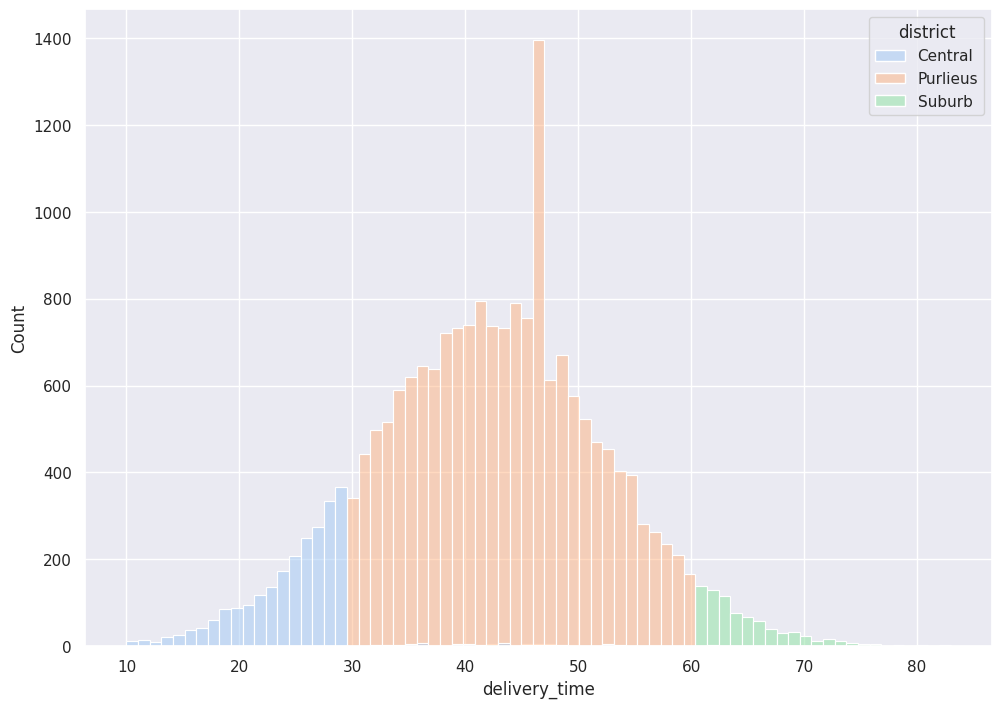

In [ ]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data = df, x = df['delivery_time'], hue = df['district'], palette = 'pastel')

<Axes: xlabel='delivery_time', ylabel='Count'>

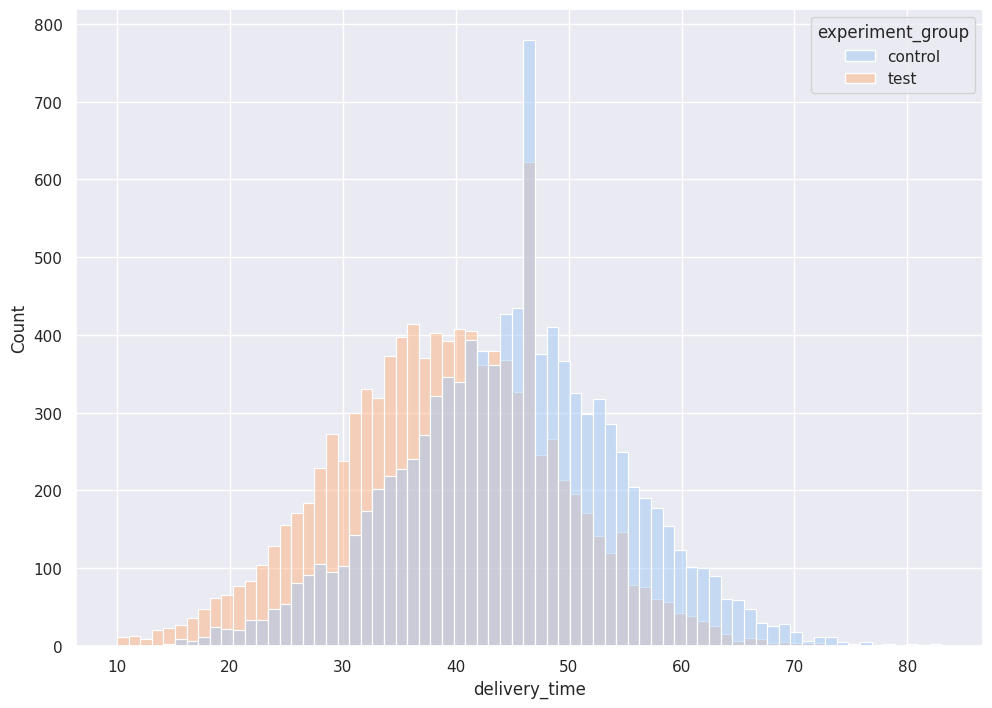

In [ ]:
sns.histplot(data = df, x = df['delivery_time'], hue = df['experiment_group'], palette = 'pastel')
#с виду распределения похожи на нормальные, за исключением некоторых чересчур выделяющихся значений. Из-за размера выборки и симметричности распределения можем не проверять распределения на нормальность

In [ ]:
a = df[df['experiment_group'] == 'test']['delivery_time']
print(a.shape)
b = df[df['experiment_group'] == 'control']['delivery_time']
b.shape

(10104,)


(10092,)

<Axes: xlabel='delivery_time', ylabel='Count'>

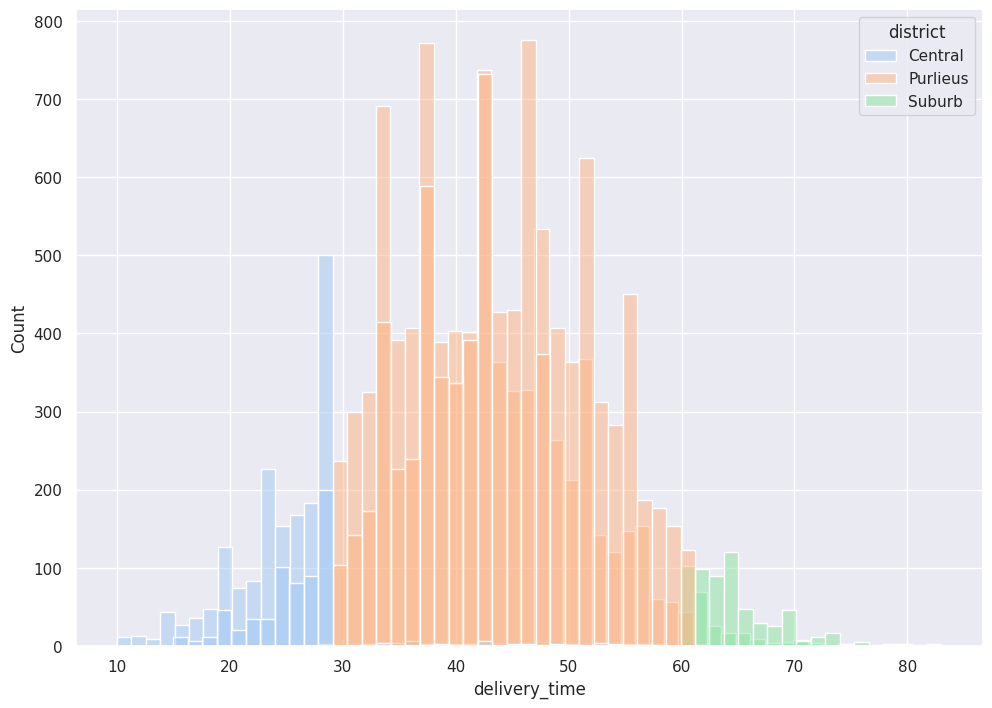

In [ ]:
sns.histplot(data = df[df['experiment_group'] == 'test'], x = 'delivery_time', hue = 'district', palette = 'pastel')
sns.histplot(data = df[df['experiment_group'] == 'control'], x = 'delivery_time', hue = 'district', palette = 'pastel')

In [ ]:
#Но - средние в группах не отличаются, реализуем t-test
from scipy import stats
p_val = stats.ttest_ind(a = a, b = b, alternative = 'two-sided')
p_val

TtestResult(statistic=-43.03582663183714, pvalue=0.0, df=20194.0)

In [ ]:
#p val < 0.05
#сделаем несколько других тестов чтобы однозначно быть уверенными в отклонении нулевой гипотезы

In [ ]:
# Сделаем непараметрический тест манна-уитни
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=33985060.0, pvalue=0.0)

In [ ]:
#p val < 0.05
#Сделаем перестановочный t test
stats.ttest_ind(a = a, b = b, alternative = 'two-sided', permutations = 3000)
#аналогично p_value < 0.05 -> можем сделать вывод, что средние по группам действительно различаются. Узнаем на сколько процентов

TtestResult(statistic=-43.03582663183714, pvalue=0.0003332222592469177, df=nan)

In [ ]:
a_avg = np.mean(a)
b_avg = np.mean(b)
print(((1 - a_avg/b_avg)*100).round(2), '%')

13.35 %
